In [1]:
import pandas as pd

from AssetAllocation.datamanger import datamanger as dm
from AssetAllocation.analytics import summary
from AssetAllocation.reporting import reports as rp, plots, formatter as fmt
import CorrelationMatrixSampler as cs
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import stochMV as stMV
import seaborn as sns
from ipywidgets import interact, interact_manual

PLAN = 'IBT'

In [2]:
#create plan object that has the relevant variables (cov, policy ret, var,fsv )
ts_dict = dm.get_ts_data(plan=PLAN)
ts_outputs = summary.get_ts_output(ts_dict)
# pp_inputs = summary.get_pp_inputs(mv_inputs, ts_dict)

# summarized_output = dm.get_plan_data('output.xlsx')
# plan = summary.get_plan_params(summarized_output)
plan = summary.get_plan_params(ts_outputs)

In [3]:
#Display plan inputs
pp_dict = plan.get_pp_dict()
@interact
def display_pp_inputs(variable=pp_dict.keys()):
    if variable == 'Corr' or variable == 'Cov':
        return plots.draw_heatmap(pp_dict[variable], half=False)
    else:
        return fmt.get_plan_styler(pp_dict[variable])

interactive(children=(Dropdown(description='variable', options=('Policy Weights', 'Asset/Liability Returns/Vol…

In [4]:
#initialize the stochastic mean variance and generate the random returns
s = stMV.stochMV(plan, 120)
s.generate_plans()

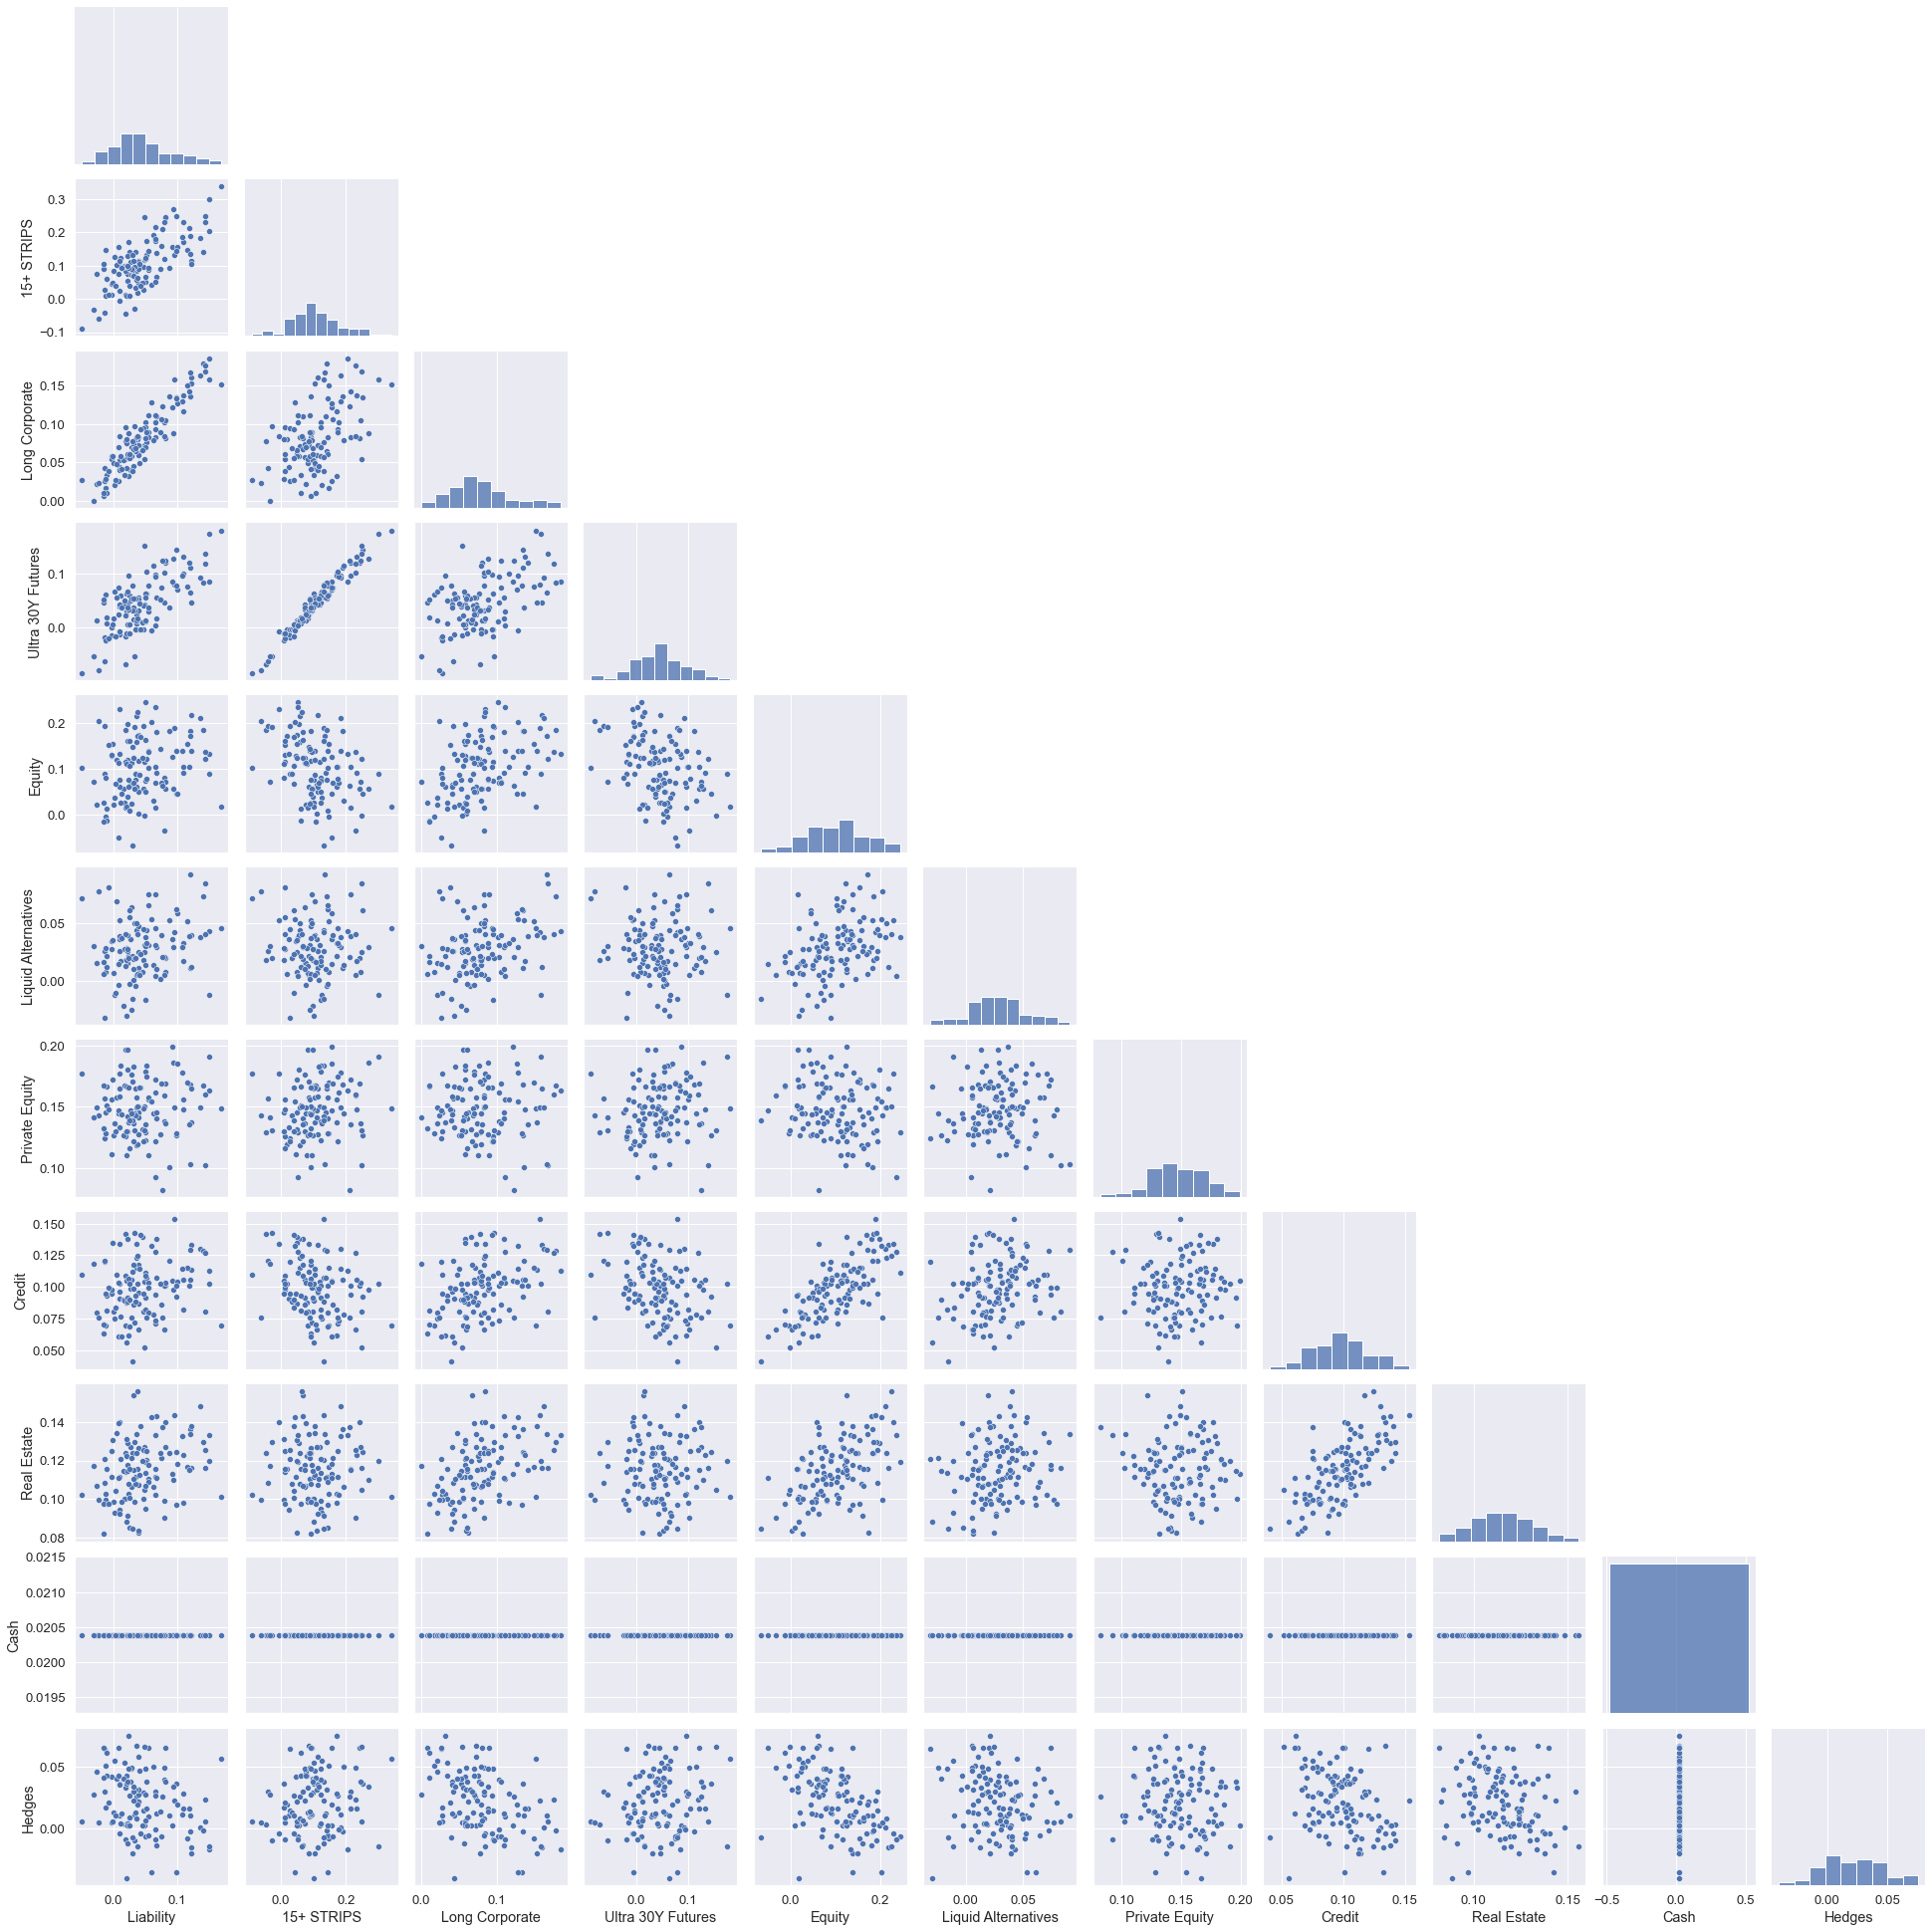

In [19]:
#visualize the simulated returns
sns.pairplot(s.returns_df, corner=True)
# plt.savefig("sampling.jpeg")

In [20]:
#definition of the boundaries and constraints for the optimization
bnds = dm.get_bounds(plan=PLAN)
cons = ({'type': 'ineq', 'fun': lambda x: np.sum(x[1:3]) - 0.5},
        {'type': 'eq', 'fun': lambda x: np.sum(x[0:len(plan)-1]) - x[3] - .02})


In [21]:
# computation of the efficient frontier for each of the simulated plan
# this takes about 5 min to run for 100 iterations, around an hour for 1000 iterations
s.generate_efficient_frontiers(bnds, cons,num_ports=25)

In [22]:
# output the dataframe which has the average allocation
ports_df = s.opt_ports_df
fmt.get_port_styler(ports_df)

,Return,Volatility,Sharpe,Liability,15+ STRIPS,Long Corporate,Ultra 30Y Futures,Equity,Liquid Alternatives,Private Equity,Credit,Real Estate,Cash,Hedges
Portfolio,,,,,,,,,,,,,,
0,4.14%,2.31%,1.7917,-100.00%,17.35%,81.30%,8.93%,0.00%,0.00%,0.00%,2.35%,0.00%,1.00%,0.06%
1,4.41%,2.33%,1.8945,-100.00%,15.14%,79.39%,13.83%,0.29%,0.00%,0.57%,5.60%,0.01%,1.00%,0.67%
2,4.64%,2.36%,1.9623,-100.00%,15.01%,76.57%,16.29%,1.44%,0.00%,2.10%,5.81%,0.07%,1.00%,1.07%
3,4.87%,2.42%,2.0166,-100.00%,15.00%,73.53%,18.70%,2.75%,0.00%,3.78%,5.76%,0.19%,1.00%,1.38%
4,5.12%,2.49%,2.0557,-100.00%,15.00%,70.27%,21.26%,4.13%,0.00%,5.25%,5.83%,0.52%,1.00%,1.77%
5,5.36%,2.58%,2.0809,-100.00%,15.00%,66.82%,23.97%,5.50%,0.00%,6.61%,6.18%,0.89%,1.00%,2.15%
6,5.61%,2.68%,2.0929,-100.00%,15.00%,63.30%,26.86%,6.96%,0.00%,7.73%,6.74%,1.28%,1.00%,2.60%
7,5.86%,2.80%,2.0914,-100.00%,15.01%,59.74%,29.81%,8.37%,0.00%,8.58%,7.33%,1.97%,1.00%,3.18%
8,6.09%,2.93%,2.0774,-100.00%,15.10%,56.33%,32.54%,9.72%,0.00%,9.34%,7.56%,2.96%,1.00%,4.00%


In [23]:
#Asset Allocation Plot
aa_fig = plots.get_aa_fig(ports_df)
aa_fig.show()

In [24]:
#Plotly version of the Efficient Frontier plot
ef_fig = plots.get_ef_fig(ports_df)
ef_fig.show()